In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a date range at 15 minute intervals for one day
date_range = pd.date_range(start='2023-01-01 00:00:00', end='2023-02-20 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'Datetime': date_range}

# Create 98 additional columns with random integer values between 1 and 100
for i in range(0, 220):
    column_name = 'CRR' + str(i)
    values = np.random.choice([0, np.random.randint(1, 10000)], size=len(date_range), p=[0.98, 0.02])
    columns[column_name] = values

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)
df.head(1)

,Datetime,CRR0,CRR1,CRR2,CRR3,CRR4,CRR5,CRR6,CRR7,CRR8,...,CRR210,CRR211,CRR212,CRR213,CRR214,CRR215,CRR216,CRR217,CRR218,CRR219
0,2023-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.insert(1, 'Date', df['Datetime'].dt.strftime('%Y-%m-%d'))

In [3]:
df['Date'].head(3)

0    2023-01-01
1    2023-01-01
2    2023-01-01
Name: Date, dtype: object

In [4]:
df.columns[21]

'CRR19'

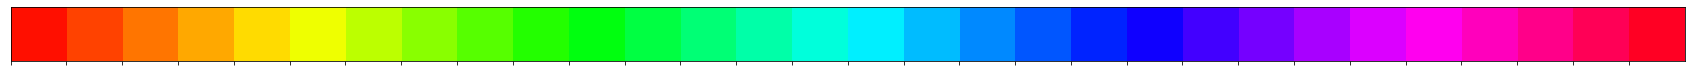

In [5]:
qualitative_colors = sns.hls_palette(30, l=0.5, s=1)
sns.palplot(qualitative_colors)

In [6]:
'''qualitative_colors = sns.color_palette('hls', 30)
sns.palplot(qualitative_colors)''';

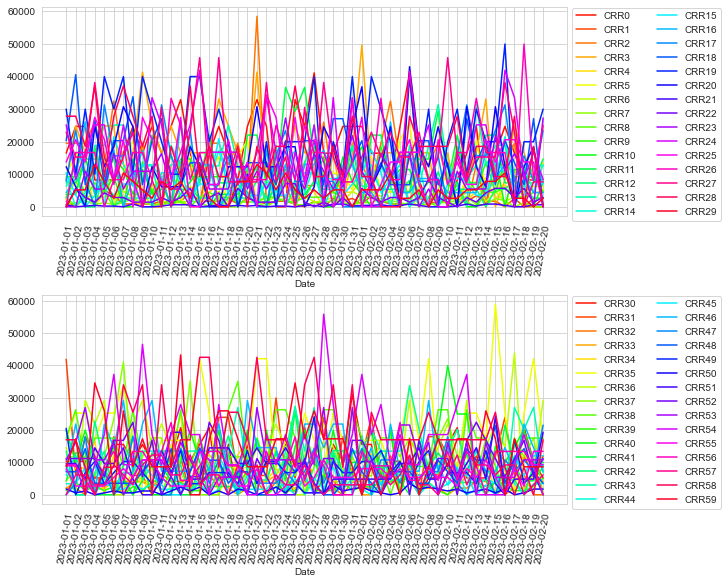

In [7]:
plt.set_loglevel('WARNING') 
sns.set_style('whitegrid')
sns.set_palette(qualitative_colors)
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False, constrained_layout=True)

for i in range(2, 32):
    sns.lineplot(ax=axes[0], data=df, x='Date', y=df.columns[i], estimator=np.sum, label=df.columns[i], ci=None)
    
for i in range(32, 62):
    sns.lineplot(ax=axes[1], data=df, x='Date', y=df.columns[i], estimator=np.sum, label=df.columns[i], ci=None)

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[0].tick_params('x', labelrotation=80)
axes[1].tick_params('x', labelrotation=80)
axes[0].legend(bbox_to_anchor=(1, 1.02), ncol=2, loc=2)
axes[1].legend(bbox_to_anchor=(1, 1.02), ncol=2, loc=2);